### SVM 최적의 파라미터 찾기
- C : 비용(cost), 결정경계선의 마진을 결정하는 파라미터  
- gammea : 커널의 데이터 포인트의 표준편차를 결정하는 파라미터

### 데이터 불러오기

In [9]:
import pickle
# 데이터 불러오기
with open('./Data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
with open('./Data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

In [14]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'gamma': [0.00001, 0.0001, 0.001, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                     ]
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X, y.values.ravel())
    print(clf.best_params_)
    
    return clf


In [15]:
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
clf = svc_param_selection(X_train, y_train, 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


### 결과 시각화

In [16]:
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

In [17]:
gamma_canditates = []
gamma_canditates.append(clf.best_params_['gamma'] * 0.01)
gamma_canditates.append(clf.best_params_['gamma'])
gamma_canditates.append(clf.best_params_['gamma'] * 100)

In [18]:
X = train[['3P', 'BLK']]
y = train['Pos'].tolist()

In [19]:
position = []
for gt in y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)


In [20]:
classifiers = []
for C in C_canditates:
    for gamma in gamma_canditates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

In [25]:
plt.figure(figsize=(20, 20))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

<Figure size 1440x1440 with 0 Axes>

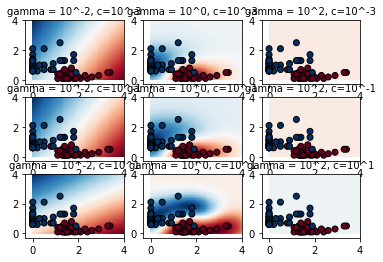

In [24]:
for (k, (C, gamma, clf)) in enumerate(classifiers):
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.subplot(len(C_canditates), len(gamma_canditates), k + 1)
    plt.title("gamma = 10^%d, c=10^%d" % (np.log10(gamma), np.log10(C)), size='medium')
    plt.pcolormesh(xx, yy, -z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')